IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

    Samy NEHLIL        21113646
    Amel BELDJILALI    21115553

Ce projet peut être fait (c'est même recommandé) en binôme. Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - mars 2022


<font size="+1" color="RED"><b>Date de rendu : vendredi 25 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur:
- les données Bases_IADS : cela correspond à un problème de classification binaire
- les données Bases_IADS_multiclasses : cela correspond à un problème de classification multiclasses

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivantes:

          -- ce_notebook.ipynb
          -- Bases_IADS/ 
              -- README.txt
              -- train.csv
              -- test.csv
              -- eval.csv
              -- names.csv
          -- Bases_IADS_multiclasses/
              -- README.txt
              -- train_multi.csv
              -- test_multi.csv
              -- eval_multi.csv
              -- names_multi.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.


Les fichiers de chaque répertoire correspondent à:
- fichier README.txt : donne des explications sur le contenu du répertoire
- fichier train*.csv : base d'apprentissage à utiliser pour construire le classfieur
- fichier test*.csv : base de test pour évaluer vous même le classifieur construit. Les exemples de ce fichier NE DOIVENT PAS être utilisés pour l'apprentissage du classifieur.
- fichier eval*.csv : fichier d'évaluation du classifieur (voir ci-dessous).

## Travail à faire

Pour chaque ensemble de données:
- les 2 algorithmes d'apprentissage knn et perceptron doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations pourront être : comparaison des taux de bonne classification apprentissage / test (avec validation croisée), visualisation, etc.
- de plus, un fichier `eval.csv` est fourni. Ce fichier contient des descriptions associées à un "faux" label. Dans votre compte-rendu, vous devez fournir un fichier CSV qui donne, pour chaque exemple du fichier `eval.csv`la classe trouvée par votre meilleur classifieur. Ainsi, le fichier CSV à rendre doit comporter 2 colonnes et autant de lignes que d'exemples (une ligne par exemple du fichier eval):<br>
            IDENTIFIANT;CLASSE_TROUVEE_POUR_CET_EXEMPLE
            ...
Le résultat de classification vous sera donné en retour (nous connaissons la vraie classe des exemples de ce fichier...).

Vos **expérimentations doivent être expliquées** (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.


Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.



## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement)
- ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !
- un fichier CSV dont le nom est de la forme: *projet-1-Nom1_Nom2.csv* (sur le modèle du nom du notebook) qui donne la classe de chaque exemple du fichier `eval.csv` trouvée par votre classifieur.


**Remarque**: en considérant que les algorithmes knn et perceptron ont été réalisés lors des séances de TME 1 à 6, le travail demandé pour ce projet correspond à, au plus, une séance complète de TME.

In [20]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Fonctions et classifieurs utilisés

In [21]:
# ------------------------ 
def plot2DSet(desc,labels):    
    """ ndarray * ndarray -> affichage
        la fonction doit utiliser la couleur 'red' pour la classe -1 et 'blue' pour la +1
    """
    data_negatifs = desc[labels == -1]
    data_positifs = desc[labels == +1]
    #Affichage
    plt.scatter(data_negatifs[:,0],data_negatifs[:,1], marker='o', color='red')
    plt.scatter(data_positifs[:,0],data_positifs[:,1], marker='x', color='blue')
    
# ------------------------ 
def plot_frontiere(desc_set, label_set, classifier, step=30):
    """ desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument est optionnel et donne la "résolution" du tracé: plus il est important
        et plus le tracé de la frontière sera précis.        
        Cette fonction affiche la frontière de décision associée au classifieur
    """
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    # colors[0] est la couleur des -1 et colors[1] est la couleur des +1
    plt.contourf(x1grid,x2grid,res,colors=["darksalmon","skyblue"],levels=[-1000,0,1000])

In [22]:
def crossval(X, Y, n_iterations, iteration):
    taille_bloc = len(Y)//n_iterations
    start,end = iteration*int(len(Y)/n_iterations), (iteration+1)*int(len(Y)/n_iterations)
    Xapp, Yapp = np.delete(X,np.s_[start:end],axis=0), np.delete(Y,np.s_[start:end],axis=0)
    Xtest, Ytest = X[start:end,:], Y[start:end]
    return Xapp, Yapp, Xtest, Ytest

In [23]:
def PCA(X, n):
    # calcul des vecteurs propres
    A = X.T @ X
    lam, V = np.linalg.eig(A)

    # affichage (print)
    print("le nombre de valeurs propres : {}".format(len(lam)))

    # tri et sélection des 2 vecteurs associés aux 2 plus grandes valeurs propres 
    sorted_index = np.argsort(lam)[::-1]
    sorted_eigenvalue = lam[sorted_index]
    sorted_eigenvectors = V[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:n]

    Xr = np.dot(eigenvector_subset.transpose() , X.transpose() ).transpose()

    print("Dimension de l'ensemble de départ : ",X.shape[1])
    print("Dimension de l'ensemble après transformation : ",Xr.shape[1])
    print("---")
    return Xr

In [24]:
# ---------------------------
class Classifier:
    """ Classe (abstraite) pour représenter un classifieur
        Attention: cette classe est ne doit pas être instanciée.
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """
        raise NotImplementedError("Please Implement this method")
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        raise NotImplementedError("Please Implement this method")
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")

    def accuracy(self, desc_set, label_set):
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        correct_pred = 0
        for i in range(len(desc_set)):
            if self.predict(desc_set[i])==label_set[i]:
                correct_pred+=1
        return correct_pred/len(desc_set)

In [25]:
class ClassifierKNN(Classifier):
    """ Classe pour représenter un classifieur par K plus proches voisins.
        Cette classe hérite de la classe Classifier
    """

    def __init__(self, input_dimension, k):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - k (int) : nombre de voisins à considérer
            Hypothèse : input_dimension > 0
        """
        self.input_dimenstion = input_dimension
        self.k = k
        
    def distance(self, x1, x2):
        return np.dot(x1-x2, x1-x2)

    def score(self,x):
        """ rend la proportion de +1 parmi les k ppv de x (valeur réelle)
            x: une description : un ndarray
        """
        score = 0
        # tableau des distances
        dist = np.asarray([self.distance(x,y) for y in self.desc_set])
        for i in np.argsort(dist)[:self.k]:
            score += 1 if self.label_set[i] == +1 else 0
        return 2 * (score/self.k -.5)
    
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
            x: une description : un ndarray
        """
        return -1 if self.score(x) < 0.5 else 1

    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """  
        self.desc_set = desc_set
        self.label_set = label_set

class ClassifierKNN_MC(Classifier):
    """
    Classifieur KNN multi-classe
    """

    def __init__(self, input_dimension, k, nb_class):
        """
        :param input_dimension (int) : dimension d'entrée des exemples
        :param k (int) : nombre de voisins à considérer
        :param nb_class (int): nombre de classes
        Hypothèse : input_dimension > 0
        """
        self.k = k
        self.nb_class = nb_class
        self.data_set = None
        self.label_set = None

    def train(self, data_set, label_set):
        self.data_set = data_set
        self.label_set = label_set

    def score(self, x):
        dist = np.linalg.norm(self.data_set-x, axis=1)
        argsort = np.argsort(dist)
        classes = self.label_set[argsort[:self.k]]
        uniques, counts = np.unique(classes, return_counts=True)
        return uniques[np.argmax(counts)]/self.nb_class

    def predict(self, x):
        return self.score(x)*self.nb_class

In [26]:
class ClassifierPerceptron(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self, input_dimension, learning_rate, init=0):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate : epsilon
                - init est le mode d'initialisation de w: 
                    - si 0 (par défaut): initialisation à 0 de w,
                    - si 1 : initialisation par tirage aléatoire de valeurs petites
        """
        self.input_dimension = input_dimension
        self.learning_rate = learning_rate
        if (init == 0):
            self.w = np.zeros(input_dimension)
        elif (init == 1):
            self.w = 0.001 * ((2 * np.random.uniform(0, 1, input_dimension) - 1))
        else:
            return -1
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """        
        index_list =[i for i in range(len(desc_set))]
        np.random.shuffle(index_list)
        for i in (index_list):
            Xi, Yi = desc_set[i], label_set[i]
            y_hat = np.dot(self.w, Xi)
            if (y_hat*Yi<=0):
                # self.w += self.learning_rate*np.dot(Xi,Yi)
                np.add(self.w, self.learning_rate*Yi*Xi, out=self.w, casting="unsafe")
     
    def train(self, desc_set, label_set, niter_max=100, seuil=0.01):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - niter_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.01) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """ 
        self.desc_set, self.label_set = desc_set, label_set
        normes_diff_list = []
        for i in range(niter_max):
            w0 = self.w.copy()
            self.train_step(desc_set, label_set)
            normes_diff_list.append(np.linalg.norm(w0-self.w))
            if normes_diff_list[-1]<seuil:
                break
        return normes_diff_list
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        return np.vdot(self.w, x)
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        return -1 if self.score(x)<=0 else +1

In [27]:
# Perceptron Multi classe
class PerceptronMultiOOA(Classifier):
    """ Perceptron multiclass OneVsAll
    """
    def __init__(self, input_dimension, learning_rate,nbC=10 , init=0):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate : epsilon
                - nbC : nombre de classes du dataset
                - init est le mode d'initialisation de w: 
                    - si 0 (par défaut): initialisation à 0 de w,
                    - si 1 : initialisation par tirage aléatoire de valeurs petites
        """
        # Liste de 10 classifieurs perceptrons: 1 pour chaque classe
        self.classifieurs = [ClassifierPerceptron(input_dimension, learning_rate) for i in range(10)]

    def train(self, desc_set, label_set):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - niter_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.01) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """        
        for i in range(len(self.classifieurs)):
            # print('Iteration {}'.format(i))
            ytmp = np.where(label_set==i, 1, -1)
            self.classifieurs[i].train(desc_set,ytmp)
    
    def score(self,x):
        """ rend le score de prédiction de chaque classifieur sur x (valeur réelle)
            x: une description
        """
        a = []
        for i in range(len(self.classifieurs)):
            a.append(self.classifieurs[i].score(x))
        return a
    
    def predict(self, x):
        """ rend la prediction (classe) sur x de 0:9
            x: une description
        """
        return np.argmax(self.score(x))
    
    def accuracy(self, desc_set, label_set):
        yhat = np.array([self.predict(x) for x in desc_set])
        return np.where(label_set == yhat, 1., 0.).mean()

In [28]:
class ClassifierADALINE2(Classifier):
    """ Perceptron de ADALINE2
    """
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples
                - learning_rate : epsilon
                - history : stockage des poids w en cours d'apprentissage
                - niter_max : borne sur les iterations
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            réalise une itération sur l'ensemble des données prises aléatoirement
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        # code de la classe ADALINE Analytique
        alpha = 1e-5
        a = desc_set.T@desc_set + alpha*np.eye(desc_set.shape[1])
        b = desc_set.T@label_set
        self.w = np.linalg.solve(a,b)
    
    def get_allw(self):
        return self.allw if self.history else []
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        return np.vdot(self.w, x)
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        return -1 if self.score(x)<=0 else 1

In [29]:
# Chargement des fichiers de données :
train_df = pd.read_csv("Bases_IADS/train.csv", sep=';', index_col=False, header= None)
test_df  = pd.read_csv("Bases_IADS/test.csv", sep=';', index_col=False, header= None)
merged_df = train_df.append(test_df)
cols = pd.read_csv("Bases_IADS/names.csv", index_col=False, sep=';').columns
# Ajouter les noms de colonnes
train_df.columns = cols
test_df.columns  = cols
merged_df.columns = cols

In [30]:
# Pour ne garder que le nom des variables de description (et pas la classe):
# sous la forme d'une liste:
columns_noms = [nom for nom in train_df.columns if nom != 'label']

In [31]:
# Passer du dataframe à des arrays:
train_set,label_set = np.array(train_df[columns_noms]),np.array(train_df['label'])
test_set,label_test = np.array(test_df[columns_noms]), np.array(test_df['label'])

In [32]:
X,Y = np.delete(train_set,0,axis=1), label_set
X_test, Y_test = np.delete(test_set,0, axis=1), label_test

In [33]:
# Chargement des données d'évaluation :
eval_df = pd.read_csv("Bases_IADS/eval.csv", sep=';', header= None)
# Ajouter les noms de colonnes
eval_df.columns = cols
# Passer du dataframe à des arrays:
eval_X, eval_Y = np.delete(np.array(eval_df[columns_noms]), 0, axis=1), np.array(eval_df['label'])

# Réduction de la dimensionnalité avec PCA et affichage des données

Afin de pouvoir visualiser les données, nous allons appliquer la réduction de dimensionnalité avec la méthode de principal component analysis PCA

In [34]:
# Application de la fonction de réduction de dimensionalité PCA
Xr_train = PCA(X,2)
Xr_test  = PCA(X_test,2)

le nombre de valeurs propres : 784
Dimension de l'ensemble de départ :  784
Dimension de l'ensemble après transformation :  2
---
le nombre de valeurs propres : 784
Dimension de l'ensemble de départ :  784
Dimension de l'ensemble après transformation :  2
---


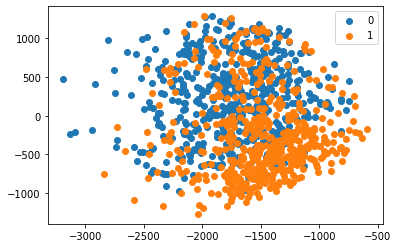

In [35]:
# affichage (plot) avec un code couleur pour les classes
plt.figure()
plt.scatter(Xr_train[Y==-1,0],Xr_train[Y==-1,1])
plt.scatter(Xr_train[Y==1,0],Xr_train[Y==1,1])
plt.legend(np.arange(2))

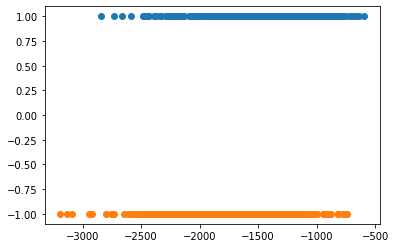

In [36]:
# Affichage de la dispersion des données du train set de chaque classe 
plt.figure()
plt.grid('on')
plt.scatter(Xr_train[Y==1,0],Y[Y==1])
plt.scatter(Xr_train[Y==-1,0],Y[Y==-1])
plt.grid()

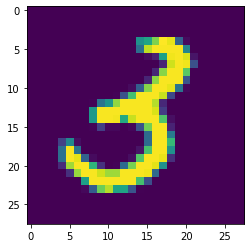

In [37]:
#affichage de la première image
mat = X[3,:].reshape(28,28)
plt.imshow(mat)

# Remarque:
<div class="alert alert-block alert-success">
Ce jeu de données correspond à une classification d'images de chiffres (0-9) de taille 28*28
</div>

<div class="alert alert-block alert-info">
Pour procéder à la résolution du problème de classification (binaire et multiclasse), nous allons appliquer l algorithme de kppv l algorithme et lalgorithme du perceptron sur les données d apprentissage, puis évaluer les performances avec les données de test, afin d en choisir le meilleur modèle et de faire les prédictions sur le fichier d évaluation.<br>
Nous allons aussi appliquer la réduction de dimensionnalité pour visualiser les résultats et les frontières de décision
obtenues.
</div>

# Problème de classification binaire

<font size="+2" color="blue"><b>Entrainement avec l'algorithme des plus proches voisins KNN</b></font>

<div class="alert alert-block alert-info">
Dans un premier temps, nous allons entrainer notre modèle sur les données d'entrainement avec l'algorithme de k-ppv.
</div>

In [42]:
def train_model_knn(desc_set,label_set, model, niter):
    '''
    Entraine un modèle kpp-v  avec la procédure de validation croisée
    '''
    perf_train = []
    perf_test = []
    tic = time.time()
    for i in range(niter):
        Xapp,Yapp,Xtest,Ytest = crossval(desc_set, label_set, niter, i)
        model.train(Xapp, Yapp)
        perf_train.append(round(model.accuracy(Xapp, Yapp),2))
        perf_test.append(round(model.accuracy(Xtest, Ytest),2))
        # print("Kfold {} : train {} - test {}".format(i, perf_train[i], perf_test[i]))
    toc= time.time()
    print("Moyenne train set: {}".format(round(np.mean(perf_train),2)))
    print("Moyenne test  set: {}".format(round(np.mean(perf_test),2)))
    print(f"Résultat en {(toc-tic):.4} secondes")
    print("---")

### Sans utilisation de la réduction de dimensionalité avec PCA

In [39]:
# Entrainement du modèle sans la procédure de validation croisée
k=3
input_dimension = 785
classifierKNN = ClassifierKNN(input_dimension,k)

classifierKNN.train(X,Y)

In [40]:
print("Précision train  set: {}%".format(round(classifierKNN.accuracy(X, Y),2)*100))
print("Précision test   set: {}%".format(round(classifierKNN.accuracy(X_test, Y_test),2)*100))

Précision train  set: 96.0%
Précision test   set: 92.0%


<div class="alert alert-block alert-success">
    En observant les résultats, on peut voir que l'algorithme de k-ppv donne une précision élevée, et donne de bonnes
    prédictions sur les nouvelles données de test (Généralise bien les résultats de son apprentissage).
</div>

---

In [43]:
# Entrainement du modèle avec la procédure de validation croisée avec nb_blocs = 10
k=3
input_dimension = 785
classifierKNN = ClassifierKNN(input_dimension,k)
# Entrainement
train_model_knn(X,Y, classifierKNN, niter=10)

Moyenne train set: 0.96
Moyenne test  set: 0.9
Résultat en 164.4 secondes
---


In [44]:
# Précision du modèle entrainé avec cross-validation sur des données nouvelles (test.set)
print("Précision test  set: {}%".format(round(classifierKNN.accuracy(X_test, Y_test),2)*100))

Précision test  set: 90.0%


### Utilisation de la réduction de dimensionalité avec PCA

<div class="alert alert-block alert-info">
Dans ce qui suit, nous allons réduire la dimensionnalité de la base d apprentissage (784 à 2) et enrtainer le modèle pour
différentes valeurs du paramètre k et afficher la frontière de décision à chaque fois.
</div>

In [45]:
k=3
input_dimension = 2
classifierKNN_pca = ClassifierKNN(input_dimension,k)
train_model_knn(Xr_train,Y, classifierKNN_pca, niter=10)

Moyenne train set: 0.76
Moyenne test  set: 0.64
Résultat en 51.42 secondes
---


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\contour.py:1503: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.asarray(x, dtype=np.float64)
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\contour.py:1504: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.asarray(y, dtype=np.float64)


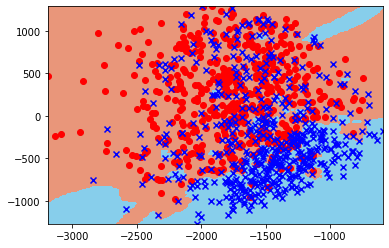

In [46]:
# Affichage de la frontière de séparation des classes
plot_frontiere(Xr_train,Y,classifierKNN_pca,step=150)
plot2DSet(Xr_train,Y)

In [47]:
k=5
input_dimension = 2
classifierKNN_pca = ClassifierKNN(input_dimension,k)
train_model_knn(Xr_train,Y, classifierKNN_pca, niter=10)

Moyenne train set: 0.78
Moyenne test  set: 0.68
Résultat en 52.47 secondes
---


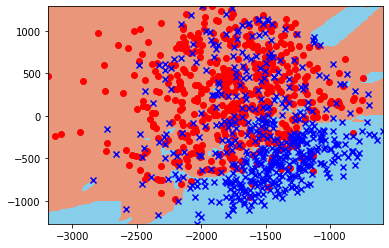

In [48]:
# Affichage de la frontière de séparation des classes
plot_frontiere(Xr_train,Y,classifierKNN_pca,step=150)
plot2DSet(Xr_train,Y)

In [49]:
k=7
input_dimension = 2
classifierKNN_pca = ClassifierKNN(input_dimension,k)
train_model_knn(Xr_train,Y, classifierKNN_pca, niter=10)

Moyenne train set: 0.74
Moyenne test  set: 0.68
Résultat en 52.53 secondes
---


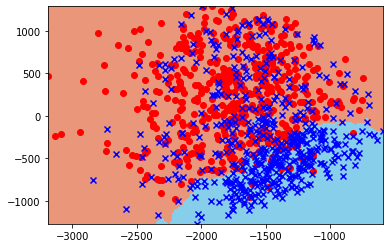

In [50]:
# Affichage de la frontière de séparation des classes
plot_frontiere(Xr_train,Y,classifierKNN_pca,step=150)
plot2DSet(Xr_train,Y)

In [51]:
k=9
input_dimension = 2
classifierKNN_pca = ClassifierKNN(input_dimension,k)
train_model_knn(Xr_train,Y, classifierKNN_pca, niter=10)

Moyenne train set: 0.75
Moyenne test  set: 0.71
Résultat en 53.14 secondes
---


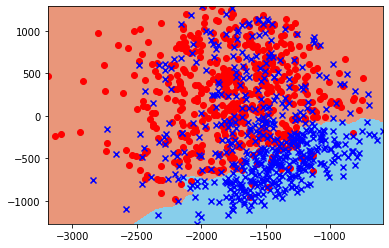

In [52]:
# Affichage de la frontière de séparation des classes
plot_frontiere(Xr_train,Y,classifierKNN_pca,step=150)
plot2DSet(Xr_train,Y)

In [53]:
# Attention: l'exécution peut prendre du temps !
input_dimension = 2
for k in range(3,11,2):
    print("k = ",k)
    classifierKNN_pca = ClassifierKNN(input_dimension,k)
    train_model_knn(Xr_train,Y, classifierKNN_pca, niter=10)

k =  3
Moyenne train set: 0.76
Moyenne test  set: 0.64
Résultat en 50.74 secondes
---
k =  5
Moyenne train set: 0.78
Moyenne test  set: 0.68
Résultat en 52.08 secondes
---
k =  7
Moyenne train set: 0.74
Moyenne test  set: 0.68
Résultat en 55.58 secondes
---
k =  9
Moyenne train set: 0.75
Moyenne test  set: 0.71
Résultat en 51.87 secondes
---


<font size="+0.5" color="red"><b>Justification du choix:</b></font>
<br>
On a décidé en premier temps d'entrainer l'algorithme de plus proches voisins sur les données d'entrainement sans réduction de dimensionnalité, puis en appliquant la réduction avec PCA afin d'analyser l'impact de la réduction sur les performances de l'algorithme et le temps d'exécution, avec comme valeur de k égale à 3, et comme procédure d'évaluation la validation croisée.

<font size="+0.5" color="red"><b>Analyse des résultats:</b></font>
- L'algorithme de knn donne de très bons résultats sur les données d'entrainement.<br>
- L'application de la réduction de dimensionnalité réduit considérablement le temps d'exécution de l'algorithme.<br>
- Le modèle knn donne de bonnes prédictions sur les données de tests (pas de sur apprentissage).

## Choix du paramètre k optimal

<font size="+0.5" color="red"><b>Justification du choix:</b></font>
<br><br>
Afin de choisir le paramètre k optimal pour notre algorithme de k-ppv, nous avons décidé de varier ce dernier dans un ensemble précis  {3, 5, 7, 9, 11} afin d'en tirer le k qui donne la meilleur précision avec un temps d'exécution réduit.

In [54]:
import copy

In [55]:
# Attention: l'exécution peut prendre du temps !
input_dimension = 784
classifiersKNN = []
for k in range(3,11,2):
    print("k = ",k)
    classifierKNN = ClassifierKNN(input_dimension,k)
    train_model_knn(X, Y, classifierKNN, niter=10)
    classifiersKNN.append(copy.deepcopy(classifierKNN))

k =  3
Moyenne train set: 0.96
Moyenne test  set: 0.9
Résultat en 164.4 secondes
---
k =  5
Moyenne train set: 0.96
Moyenne test  set: 0.9
Résultat en 168.9 secondes
---
k =  7
Moyenne train set: 0.94
Moyenne test  set: 0.89
Résultat en 169.1 secondes
---
k =  9
Moyenne train set: 0.94
Moyenne test  set: 0.89
Résultat en 168.3 secondes
---


In [56]:
# Précision du modèle entrainé avec cross-validation sur des données nouvelles (test.set)
k=3
for classifieur in classifiersKNN:
    print("k = {} - Précision sur le test  set: {}%".format(k,round(classifieur.accuracy(X_test, Y_test),2)*100))
    k+=2

k = 3 - Précision sur le test  set: 90.0%
k = 5 - Précision sur le test  set: 91.0%
k = 7 - Précision sur le test  set: 89.0%
k = 9 - Précision sur le test  set: 90.0%


<font size="+0.5" color="red"><b>Analyse des résultats:</b></font>
- Les valeurs du résultats sont presque similaires, avec des temps de calcul légèrement différents.
- La valeur de k optimal est : 5.
- L'algorithme donne de bonnes prédictions sur les données de test.

## Application du modèle knn optimal sur les données du fichier eval.csv

In [57]:
# Chargement des fichiers de données :
eval_df = pd.read_csv("Bases_IADS/eval.csv", sep=';', header= None)
# Ajouter les noms de colonnes
eval_df.columns = cols
# Passer du dataframe à des arrays:
eval_X, eval_Y = np.array(eval_df[columns_noms])[:,1:], np.array(eval_df['label'])

In [58]:
# Classifieurs avec k = 5
classifierKNN = classifiersKNN[1]
for i in range(len(eval_X)):
    eval_Y[i] = classifierKNN.predict(eval_X[i])

In [59]:
# Sauvegarde des résultats dans un fichier de sortie
a = np.array(eval_df[columns_noms])[:,0]
a = a.reshape(a.shape[0],1)
df = pd.DataFrame(np.insert(a, 1, eval_Y, axis=1))
df.to_csv("Bases_IADS/projet-1-NEHLIL_BELDJILALI.csv", header=False, index=False, sep=";")

<br><br>
<font size="+2" color="blue"><b>Entrainement du modèle avec l'algorithme de perceptron</b></font>
<br>

Dans cette partie du projet, nous allons appliquer les différentes versions de l'algorithme du perceptron que nous avons développé lors des séances tmes précédentes : 
1. Perceptron simple
2. Perceptron adaline analytique (adaline 2)

Pour chaque algorithme listé ci-dessus, nous allons évaluer les performances (précision) sans la procédure de validation croisée en premier temps, puis en appliquant cette procédure afin de comparer les différents modèles et d'en tirer le meilleur.

## Perceptron simple

### Sans utilisation de la procédure de validation croisée

In [60]:
# Sans utilisation de la procédure de cross validation
# Entrainement du modèle sur le train_set, et évaluation sur le test_set

# Création d'un perceptron avec initialisation à 0 et le learning_rate ci-dessous:
learning_rate = 0.01
input_dimension = 784
perceptron = ClassifierPerceptron(input_dimension,learning_rate)
tic = time.time()
# Entrainement du modèle
perceptron.train(X, Y)
toc = time.time()
print("---")
print("Précision train set : ", round(perceptron.accuracy(X, Y),2)*100,"%")
print("Précision test set  : ", round(perceptron.accuracy(X_test, Y_test),2)*100,"%")
print(f"Résultat en {(toc-tic):.4} secondes")

---
Précision train set :  100.0 %
Précision test set  :  87.0 %
Résultat en 0.6588 secondes


<font size="+0.5" color="red"><b>Justification du choix:</b></font><br>
    Une première utilisation de l'algorithme du perceptron simple consiste à l'entrainer simplement sur le train set et tester les résultats sur le test set.<br><br>
<font size="+0.5" color="red"><b>Analyse des résultats:</b></font><br>
    l'algorithme du perceptron simple donne de bons résultats sur le test set, ceci revient à dire qu'il généralise correctement les résultats de son apprentissage à d'autres données (pas de sur-apprentissage).

### Utilisation de la procédure de validation croisée

En premier lieu, nous allons travailler uniquement sur le train set (fichier train.csv)

In [61]:
# Création d'un perceptron avec initialisation à 0 et le learning_rate ci-dessous:
learning_rate = 0.01
input_dimension = 784
perf_train, perf_test = [], []
niter = 10
tic = time.time()
perceptron = ClassifierPerceptron(input_dimension,learning_rate)
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval(X, Y, niter, i)
    perceptron.train(Xapp, Yapp)
    perf_train.append(round(perceptron.accuracy(Xapp, Yapp),2))
    perf_test.append(round(perceptron.accuracy(Xtest, Ytest),2))
    print("Kfold {} : train {}%  -  test {}%".format(i, perf_train[i]*100, perf_test[i]*100))
toc= time.time()
print("---")
print("Moyenne train set: {}%".format(round(np.mean(perf_train),2)*100))
print("Moyenne test  set: {}%".format(round(np.mean(perf_test),2)*100))
print(f"Résultat en {(toc-tic):.4} secondes")
print("---")

Kfold 0 : train 100.0%  -  test 86.0%
Kfold 1 : train 100.0%  -  test 96.0%
Kfold 2 : train 100.0%  -  test 98.0%
Kfold 3 : train 100.0%  -  test 100.0%
Kfold 4 : train 100.0%  -  test 100.0%
Kfold 5 : train 100.0%  -  test 100.0%
Kfold 6 : train 100.0%  -  test 100.0%
Kfold 7 : train 100.0%  -  test 100.0%
Kfold 8 : train 100.0%  -  test 100.0%
Kfold 9 : train 100.0%  -  test 100.0%
---
Moyenne train set: 100.0%
Moyenne test  set: 98.0%
Résultat en 1.341 secondes
---


In [62]:
# Précision du modèle entrainé avec cross-validation sur des données nouvelles (test.set)
print("Précision test  set: {}%".format(round(perceptron.accuracy(X_test, Y_test),2)*100))

Précision test  set: 86.0%


<font size="+0.5" color="red"><b>Justification du choix:</b></font><br>
    Pour avoir une meilleure vue sur les performances du modèle du perceptron et de sa capacité à généraliser son apprentissage à d'autres résultats (ie éviter le problème de overfitting), nous avons tourné l'algorithme avec la procédure de validation croisée sur train set, avec un nombre de kfold égal à 10 (divisé en 10 blocs en chaque itérations).<br>
<br>
<font size="+0.5" color="red"><b>Analyse des résultats:</b></font><br>
- L'algorithme du perceptron simple donne de très bons résultats par la procédure de validation croisée, car il donne de bonne prédictions sur les données de test pour chaque kfold.<br>
- De plus, en ayant tester le modèle sur tout l'ensemble de test (test set), les performances obtenues sont de ~84%, ce qui veut dit que notre modèle donne de bonnes prédictions sur de nouvelles données autres que celles de l'apprentissage, ceci revient à dire qu'il généralise correctement les résultats de son apprentissage à d'autres données (pas de sur-apprentissage).

<font size="+0.5" color="red"><b>Justification du choix:</b></font><br>
    Pour avoir une meilleure vue sur les performances du modèle du perceptron et de sa capacité à généraliser son apprentissage à d'autres résultats (ie éviter le problème de overfitting), nous avons tourné l'algorithme avec la procédure de validation croisée sur train set, avec un nombre de kfold égal à 10 (divisé en 10 blocs en chaque itérations).<br>
<br>
<font size="+0.5" color="red"><b>Analyse des résultats:</b></font><br>
    Même avec un ensemble plus grand, le modèle du perceptron simple donne toujours de bons résultats sur les données.

### Perceptron simple avec réduction de dimensionnalité

In [63]:
learning_rate = 0.01
input_dimension = 2
perf_train, perf_test = [], []
niter = 10
tic = time.time()
perceptron_pca = ClassifierPerceptron(input_dimension,learning_rate)
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval(Xr_train, Y, niter, i)
    perceptron_pca.train(Xapp, Yapp)
    perf_train.append(round(perceptron_pca.accuracy(Xapp, Yapp),2))
    perf_test.append(round(perceptron_pca.accuracy(Xtest, Ytest),2))
    print("Kfold {} : train {}  -  test {}".format(i, perf_train[i], perf_test[i]))
toc= time.time()
print("---")
print("Moyenne train set: {}".format(round(np.mean(perf_train),2)))
print("Moyenne test  set: {}".format(round(np.mean(perf_test),2)))
print(f"Résultat en {(toc-tic):.4} secondes")
print("---")

C:\Users\PC\AppData\Local\Temp\ipykernel_5264\2346243012.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  np.add(self.w, self.learning_rate*Yi*Xi, out=self.w, casting="unsafe")


Kfold 0 : train 0.66  -  test 0.98
Kfold 1 : train 0.56  -  test 0.0
Kfold 2 : train 0.44  -  test 1.0
Kfold 3 : train 0.7  -  test 0.38
Kfold 4 : train 0.57  -  test 0.0
Kfold 5 : train 0.56  -  test 0.0
Kfold 6 : train 0.56  -  test 0.0
Kfold 7 : train 0.72  -  test 0.55
Kfold 8 : train 0.56  -  test 0.0
Kfold 9 : train 0.49  -  test 0.89
---
Moyenne train set: 0.58
Moyenne test  set: 0.38
Résultat en 12.69 secondes
---


In [64]:
# Précision du modèle entrainé avec cross-validation sur des données nouvelles (test.set)
print("Précision test  set: {}%".format(round(perceptron_pca.accuracy(Xr_test, Y_test),2)*100))

Précision test  set: 45.0%


In [65]:
learning_rate = 0.01
input_dimension = 2
perf_train, perf_test = [], []
niter = 10
tic = time.time()
perceptron_pca = ClassifierPerceptron(input_dimension,learning_rate)
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval(Xr_train, Y, niter, i)
    perceptron_pca.train(Xapp, Yapp)
    perf_train.append(round(perceptron_pca.accuracy(Xapp, Yapp),2))
    perf_test.append(round(perceptron_pca.accuracy(Xtest, Ytest),2))
    print("Kfold {} : train {}  -  test {}".format(i, perf_train[i], perf_test[i]))
toc= time.time()
print("---")
print("Moyenne train set: {}".format(round(np.mean(perf_train),2)))
print("Moyenne test  set: {}".format(round(np.mean(perf_test),2)))
print(f"Résultat en {(toc-tic):.4} secondes")
print("---")

C:\Users\PC\AppData\Local\Temp\ipykernel_5264\2346243012.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  np.add(self.w, self.learning_rate*Yi*Xi, out=self.w, casting="unsafe")


Kfold 0 : train 0.56  -  test 0.0
Kfold 1 : train 0.44  -  test 1.0
Kfold 2 : train 0.44  -  test 1.0
Kfold 3 : train 0.56  -  test 0.0
Kfold 4 : train 0.72  -  test 0.65
Kfold 5 : train 0.67  -  test 0.41
Kfold 6 : train 0.68  -  test 0.93
Kfold 7 : train 0.56  -  test 0.0
Kfold 8 : train 0.77  -  test 0.27
Kfold 9 : train 0.59  -  test 0.68
---
Moyenne train set: 0.6
Moyenne test  set: 0.49
Résultat en 12.62 secondes
---


<font size="+0.5" color="red"><b>Justification du choix:</b></font><br>
    Afin d'essayer de réduire le temps de calcul sur les données d'entrainement et d'afficher la frontière de décision, nous avons pensé à utiliser la réduction de dimensionnalité avec PCA.<br>
<br>
<font size="+0.5" color="red"><b>Analyse des résultats:</b></font><br>
- L'application de la réduction de dimensionnalité réduit les performances, on peut justifier ça par le fait que la réduction de dimensionnalité réduit égélement la quantité d'information que peuvent contenir tout les attributs.<br>

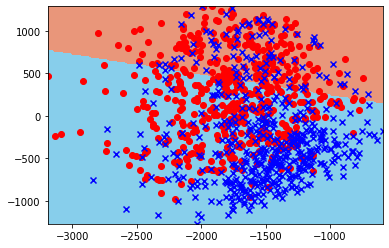

In [66]:
# Affichage de la frontière de séparation des classes
plot_frontiere(Xr_train,Y,perceptron_pca,step=150)
plot2DSet(Xr_train,Y)

## Classifier Adaline analytique

Entrainement du modèle d'apprentissage avec l'algorithme perceptron analytique -adaline2- sans la procédure de validation croisée, puis avec la validation croisée, et comparaison des performances.

In [67]:
# Entrainement des données d'apprentissage avec l'algorithme adaline analytique
input_dimension = 784
adaline2 = ClassifierADALINE2(input_dimension) 

tic= time.time()
adaline2.train(X, Y)
toc= time.time()

print("---")
print("Précision train set: {}%".format(adaline2.accuracy(X,Y)*100))
print("Précision test  set: {}%".format(adaline2.accuracy(X_test,Y_test)*100))
print(f"Résultat en {(toc-tic):.4} secondes")
print("---")

---
Précision train set: 99.1%
Précision test  set: 79.9%
Résultat en 2.182 secondes
---


In [68]:
# Précision du modèle entrainé avec cross-validation sur des données nouvelles (test.set)
print("Précision test  set: {}%".format(round(adaline2.accuracy(X_test, Y_test),2)*100))

Précision test  set: 80.0%


In [69]:
# Création d'un perceptron avec initialisation à 0 et le learning_rate ci-dessous:
input_dimension = 784
perf_train = []
niter = 10

models = []
acc = []
tic = time.time()
adaline2 = ClassifierADALINE2(input_dimension)
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval(X, Y, niter, i)
    adaline2.train(Xapp, Yapp)
    perf_train.append(round(adaline2.accuracy(Xapp, Yapp),2))
    perf_test.append(round(adaline2.accuracy(Xtest, Ytest),2))
    print("Kfold {} : train {}%  -  test {}%".format(i, perf_train[i]*100, perf_test[i]*100))
toc= time.time()
print("---")
print("Moyenne train set: {}%".format(round(np.mean(perf_train),2)*100))
print("Moyenne test  set: {}%".format(round(np.mean(perf_test),2)*100))
print(f"Résultat en {(toc-tic):.4} secondes")
print("---")

Kfold 0 : train 100.0%  -  test 0.0%
Kfold 1 : train 100.0%  -  test 100.0%
Kfold 2 : train 100.0%  -  test 100.0%
Kfold 3 : train 100.0%  -  test 0.0%
Kfold 4 : train 100.0%  -  test 65.0%
Kfold 5 : train 100.0%  -  test 41.0%
Kfold 6 : train 99.0%  -  test 93.0%
Kfold 7 : train 100.0%  -  test 0.0%
Kfold 8 : train 99.0%  -  test 27.0%
Kfold 9 : train 100.0%  -  test 68.0%
---
Moyenne train set: 100.0%
Moyenne test  set: 64.0%
Résultat en 19.45 secondes
---


In [70]:
# Précision du modèle entrainé avec cross-validation sur des données nouvelles (test.set)
print("Précision test  set: {}%".format(round(adaline2.accuracy(X_test, Y_test),2)*100))

Précision test  set: 78.0%


<font size="+0.5" color="red"><b>Analyse des résultats:</b></font><br>
- Le classifieur adaline analytique donne de bons résultats par la procédure de validation croisée.
- Le classifieur donne de bonnes prédictions sur des nouvelles données (test.csv) (pas de problème d'overvitting).
- Le temps cpu d'entrainement de ce classifieur est réduit, ceci est justifié car le classifieur adaline analytique effectue des opérations sur des matrices.

# Problème de classification multiclasses

In [71]:
# Chargement des fichiers de données :
train_df = pd.read_csv("Bases_IADS_multiclasses/train_multi.csv", sep=';', header= None)
test_df  = pd.read_csv("Bases_IADS_multiclasses/test_multi.csv", sep=';', header= None)

cols = pd.read_csv("Bases_IADS_multiclasses/names_multi.csv",sep=';').columns
# Ajouter les noms de colonnes
train_df.columns = cols
test_df.columns  = cols

In [72]:
# Pour ne garder que le nom des variables de description (et pas la classe):
# sous la forme d'une liste:
columns_noms = [nom for nom in train_df.columns if nom != 'label']

In [73]:
# Passer du dataframe à des arrays:
X_multi, Y_multi = np.delete(np.array(train_df[columns_noms]),0, axis=1),np.array(train_df['label'])
Xtest_multi, Ytest_multi = np.delete(np.array(test_df[columns_noms]), 0,axis=1), np.array(test_df['label'])

In [75]:
# Application de la fonction de réduction de dimensionalité PCA
Xr = PCA(X_multi,2)
Xr_test_mc  = PCA(Xtest_multi,2)

le nombre de valeurs propres : 784
Dimension de l'ensemble de départ :  784
Dimension de l'ensemble après transformation :  2
---
le nombre de valeurs propres : 784
Dimension de l'ensemble de départ :  784
Dimension de l'ensemble après transformation :  2
---


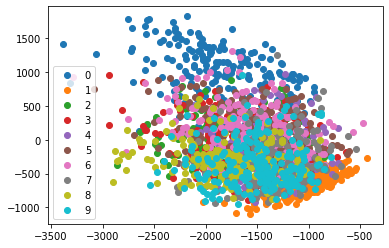

In [76]:
plt.figure()
plt.scatter(Xr[Y_multi==0,0],Xr[Y_multi==0,1])
plt.scatter(Xr[Y_multi==1,0],Xr[Y_multi==1,1])
plt.scatter(Xr[Y_multi==2,0],Xr[Y_multi==2,1])
plt.scatter(Xr[Y_multi==3,0],Xr[Y_multi==3,1])
plt.scatter(Xr[Y_multi==4,0],Xr[Y_multi==4,1])
plt.scatter(Xr[Y_multi==5,0],Xr[Y_multi==5,1])
plt.scatter(Xr[Y_multi==6,0],Xr[Y_multi==6,1])
plt.scatter(Xr[Y_multi==7,0],Xr[Y_multi==7,1])
plt.scatter(Xr[Y_multi==8,0],Xr[Y_multi==8,1])
plt.scatter(Xr[Y_multi==9,0],Xr[Y_multi==9,1])
# ####################################
plt.legend(np.arange(10))

## KNN

In [77]:
# Entrainement du modèle perceptron multiclasse avec l'algorithme k-ppv et k = 3
index = np.random.permutation(len(X_multi))
Xm, Ym  = X_multi[index], Y_multi[index]
niter = 10
perf_train, perf_test = [], []
tic= time.time()
modelKNN_MC = ClassifierKNN_MC(784, 3, nb_class=10)
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval(Xm, Ym, niter, i)
    modelKNN_MC.train(Xapp, Yapp)
    perf_train.append(round(modelKNN_MC.accuracy(Xapp, Yapp),2))
    perf_test.append(round(modelKNN_MC.accuracy(Xtest, Ytest),2))
    print("Kfold {} : train {}  -  test {}".format(i, perf_train[i], perf_test[i]))
toc= time.time()
print("---")
print("Moyenne train set: {}".format(round(np.mean(perf_train),2)))
print("Moyenne test  set: {}".format(round(np.mean(perf_test),2)))
print(f"Résultat en {(toc-tic):.4} secondes")
print("---")

Kfold 0 : train 0.94  -  test 0.93
Kfold 1 : train 0.95  -  test 0.9
Kfold 2 : train 0.95  -  test 0.91
Kfold 3 : train 0.95  -  test 0.89
Kfold 4 : train 0.95  -  test 0.88
Kfold 5 : train 0.94  -  test 0.89
Kfold 6 : train 0.94  -  test 0.9
Kfold 7 : train 0.95  -  test 0.89
Kfold 8 : train 0.94  -  test 0.9
Kfold 9 : train 0.94  -  test 0.89
---
Moyenne train set: 0.94
Moyenne test  set: 0.9
Résultat en 414.9 secondes
---


In [78]:
# Précision du modèle entrainé avec cross-validation sur des données nouvelles (test.set)
print("Précision test  set: {}%".format(round(modelKNN_MC.accuracy(Xtest_multi, Ytest_multi),2)*100))

Précision test  set: 90.0%


In [79]:
# Entrainement du modèle perceptron multiclasse avec l'algorithme k-ppv et k = 3
index = np.random.permutation(len(X_multi))
Xm, Ym  = X_multi[index], Y_multi[index]
niter = 10
perf_train, perf_test = [], []
tic= time.time()
modelKNN_MC = ClassifierKNN_MC(784, 5, nb_class=10)
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval(Xm, Ym, niter, i)
    modelKNN_MC.train(Xapp, Yapp)
    perf_train.append(round(modelKNN_MC.accuracy(Xapp, Yapp),2))
    perf_test.append(round(modelKNN_MC.accuracy(Xtest, Ytest),2))
    print("Kfold {} : train {}  -  test {}".format(i, perf_train[i], perf_test[i]))
toc= time.time()
print("---")
print("Moyenne train set: {}".format(round(np.mean(perf_train),2)))
print("Moyenne test  set: {}".format(round(np.mean(perf_test),2)))
print(f"Résultat en {(toc-tic):.4} secondes")
print("---")

Kfold 0 : train 0.93  -  test 0.94
Kfold 1 : train 0.94  -  test 0.91
Kfold 2 : train 0.93  -  test 0.94
Kfold 3 : train 0.93  -  test 0.91
Kfold 4 : train 0.94  -  test 0.88
Kfold 5 : train 0.93  -  test 0.86
Kfold 6 : train 0.93  -  test 0.93
Kfold 7 : train 0.93  -  test 0.91
Kfold 8 : train 0.93  -  test 0.89
Kfold 9 : train 0.94  -  test 0.82
---
Moyenne train set: 0.93
Moyenne test  set: 0.9
Résultat en 319.3 secondes
---


In [80]:
# Précision du modèle entrainé avec cross-validation sur des données nouvelles (test.set)
print("Précision test  set: {}%".format(round(modelKNN_MC.accuracy(Xtest_multi, Ytest_multi),2)*100))

Précision test  set: 90.0%


<font size="+0.5" color="red"><b>Justification du choix:</b></font><br>
Afin de répondre au problème de classification multiclasse, nous avons exécuté l'algorithme de kpp-v en version multiclasse sur l'ensemble des données d'apprentissage avec la procédure de validation croisée. Puis on a testé le modèle obtenu sur les données de test (test_MC.csv).<br>
<br>
<font size="+0.5" color="red"><b>Analyse des résultats:</b></font><br>
- Le modèle donne de bonnes prédictions avec la procédure de validation croisée et sur les données de test.<br>

## Perceptron multiclasses

In [81]:
# Entrainement du modèle perceptron multiclasse
index = np.random.permutation(len(X_multi))
Xm, Ym  = X_multi[index], Y_multi[index]
niter = 10
perf_train, perf_test = [], []
tic= time.time()
perceptronMC = PerceptronMultiOOA(784, 1e-2, nbC=10, init=0)
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval(Xm, Ym, niter, i)
    perceptronMC.train(Xapp, Yapp)
    perf_train.append(round(perceptronMC.accuracy(Xapp, Yapp),2))
    perf_test.append(round(perceptronMC.accuracy(Xtest, Ytest),2))
    print("Kfold {} : train {}  -  test {}".format(i, perf_train[i], perf_test[i]))
toc= time.time()
print("---")
print("Moyenne train set: {}".format(round(np.mean(perf_train),2)))
print("Moyenne test  set: {}".format(round(np.mean(perf_test),2)))
print(f"Résultat en {(toc-tic):.4} secondes")
print("---")

Kfold 0 : train 1.0  -  test 0.84
Kfold 1 : train 1.0  -  test 0.94
Kfold 2 : train 1.0  -  test 0.98
Kfold 3 : train 1.0  -  test 1.0
Kfold 4 : train 1.0  -  test 1.0
Kfold 5 : train 1.0  -  test 1.0
Kfold 6 : train 1.0  -  test 1.0
Kfold 7 : train 1.0  -  test 1.0
Kfold 8 : train 1.0  -  test 1.0
Kfold 9 : train 1.0  -  test 1.0
---
Moyenne train set: 1.0
Moyenne test  set: 0.98
Résultat en 7.545 secondes
---


In [82]:
# Précision du modèle entrainé avec cross-validation sur des données nouvelles (test.set)
print("Précision test  set: {}%".format(round(perceptronMC.accuracy(Xtest_multi, Ytest_multi),2)*100))

Précision test  set: 82.0%


# Test sur les données du fichier eval_multi.csv

In [83]:
# Chargement des données d'évaluation :
eval_df = pd.read_csv("Bases_IADS_multiclasses/eval_multi.csv", sep=';', header= None)
# Ajouter les noms de colonnes
eval_df.columns = cols
# Passer du dataframe à des arrays:
eval_X_MC, eval_Y_MC = np.array(eval_df[columns_noms])[:,1:], np.array(eval_df['label'])

In [84]:
for i in range(len(eval_X_MC)):
    eval_Y_MC[i] = modelKNN_MC.predict(eval_X_MC[i])

In [85]:
# Sauvegarde des résultats dans un fichier de sortie
a = np.array(eval_df[columns_noms])[:,0]
a = a.reshape(a.shape[0],1)
df = pd.DataFrame(np.insert(a, 1, eval_Y_MC, axis=1))
df.to_csv("Bases_IADS_multiclasses/projet-1-NEHLIL_BELDJILALI_multi.csv", header=False, index=False, sep=";")

# KNN vs PERCEPTRON

On peut résumer les différences entre le modèle en kpp-v et le modèle du perceptron dans les points suivants :<br> 
<br>
<font size="+0.5" color="red"><b>Performances:</b></font><br>
Les deux modèles du perceptron et knn sont performants en terme d'accuracy, on peut constater ça via les différentes expérimentations qu'on a pu réaliser. Ce constat est valable et pour le problème de classification binaire et celui avec multiclasses.
<br>
<br>
<font size="+0.5" color="red"><b>Temps d'exécution:</b></font><br>
Le modèle du perceptron est nettement plus rapide que celui du knn en terme de temps d'exécution, on peut constater ça via les différentes expérimentations qu'on a pu réaliser. On peut comprendre ce constat par une analyse de la conception des deux modèles: Pour donner la prédiction sur une observation xi donnée, l'algorithme du knn calcule la distance qui le sépare de toutes les autres observations de l'ensemble des données de l'entrainement pour en choisir les k plus proches.<br>
<br>
<font size="+0.5" color="red"><b>Généralisation vers de nouvelles données:</b></font><br>
Les modèle du knn et perceptron donnent de bonnes prédictions sur les nouvelles données (pas de overfitting).